In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import astropy.units as u

## SMpy module:
from smpy.smpy import *


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
# Make the plots prettier
sns.set_context('talk')
sns.set_style('white')

## Basic flow chart:

### SSP -> CSP -> Models

### Models + Filters -> Observations

# Building the model SEDs

## Loading SSP models

The *ssp* sub-module currently includes classes for loading in Bruzual & Charlot and BPASS SSP models. After downloading separately, the Bruzual & Charlot models can be loaded by simply pointing the class towards the directory which holds the *.ised* files you want to use:

In [3]:
from smpy.ssp import BC

bc03 = BC('data/ssp/bc03/chab/lr/')

The *bc03* object now contains all of the key data and arrays included in the SSP files. All of these can be accessed as attributes, for example to see what ages and metallicities (relative to solar) are available:

In [4]:
bc03.ages

<Quantity [  1.00000000e+01,  1.25893000e+05,  1.41254000e+05,
             1.58489000e+05,  1.77828000e+05,  1.99527000e+05,
             2.23873000e+05,  2.51189000e+05,  2.81839000e+05,
             3.16229000e+05,  3.54815000e+05,  3.98109000e+05,
             4.46686000e+05,  5.01190000e+05,  5.62344000e+05,
             6.30961000e+05,  7.07950000e+05,  7.94334000e+05,
             8.91257000e+05,  1.00000000e+06,  1.04713000e+06,
             1.09648000e+06,  1.14815000e+06,  1.20226000e+06,
             1.25893000e+06,  1.31826000e+06,  1.38038000e+06,
             1.44544000e+06,  1.51356000e+06,  1.58489000e+06,
             1.65959000e+06,  1.73780000e+06,  1.81970000e+06,
             1.90546000e+06,  1.99526000e+06,  2.08929000e+06,
             2.18776000e+06,  2.29087000e+06,  2.39883000e+06,
             2.51188000e+06,  2.63027000e+06,  2.75423000e+06,
             2.88403000e+06,  3.01995000e+06,  3.16227000e+06,
             3.31131000e+06,  3.46736000e+06,  3.630780

(Note the zero age models from the .ised files have been given a small but non-zero age to facilitate the proper interpolation and integration used when building CSPs)

In [5]:
bc03.metallicities

array([ 0.005,  0.02 ,  0.2  ,  0.4  ,  1.   ,  2.5  ])

## Building composite stellar populations

Once a set of SSP models have been set up, building either single composite stellar populations or grids of models can be done very simply using the *CSP* class.

As well as an *SSP* class, the *CSP* class takes as input the following variables for a stellar population:

- Age : time since the onset of star-formation. Astropy units are totally integrated so this value or array needs to be in units of time.
- Star-formation history parameter : for example the $\tau$ value (in units of time) for an exponential decline. 
- Dust extinction: Av extinction magnitudes 
- Metallicities (relative to solar) : SSP metallicities to use, the code automatically interpolates (in log space) so not restricted to the fixed BC03/BPASS values.
- Escape fraction : 0 to 1 (default = 1, i.e. no nebular emission)

Other parameters:
- star-formation history parameterisation: exponential (default), power law, 'delayed', truncated, truncated exponential
- dust law : Calzetti (default), Charlot & Fall, SMC, LMC, MW, Noll et al. flexible parameterisation (2-parameter)


### Example - UVJ colour tracks

For the UVJ tracks we want to look at how quiescent and star-forming populations evolve with age. As input we choose a range of suitable *ages* and two exponential timescales, one burst ($\tau = 100$ Myr) and one ~continuous ($\tau = 1000$ Gyr):

In [6]:
ages = np.logspace(8,10, 50) * u.yr
sfh = np.array([0.1, 1000]) * u.Gyr

For this example, we want zero dust extinction and a solar metallicity. Building the grid of 100 models is then just one line of code:

In [7]:
models = CSP(bc03, ages, sfh, 0., 1.)


Initially all models are normalised to $1 \text{M}_{\odot}$, however they can be re-normalised to any desired scale, e.g.:

In [8]:
models *= 1e10

In [9]:
models.SED

<Quantity [[[[[[  5.18205878e+05,  5.92258688e+05,  6.33081173e+05,...,
                  2.45397835e-01,  1.32219056e-01,  7.73636841e-02]]],


             [[[  8.38117478e+05,  9.57774451e+05,  1.02380476e+06,...,
                  2.95610586e-01,  1.59311791e-01,  9.32370590e-02]]]],



            [[[[  4.47147679e+05,  5.11461723e+05,  5.46924688e+05,...,
                  2.25076790e-01,  1.21257385e-01,  7.09429198e-02]]],


             [[[  7.64743139e+05,  8.74638891e+05,  9.35298404e+05,...,
                  2.78787024e-01,  1.50236039e-01,  8.79205662e-02]]]],



            [[[[  3.83577171e+05,  4.38815362e+05,  4.69269774e+05,...,
                  2.06739767e-01,  1.11369966e-01,  6.51532791e-02]]],


             [[[  6.96416896e+05,  7.96836936e+05,  8.52279208e+05,...,
                  2.63341428e-01,  1.41906281e-01,  8.30423137e-02]]]],



            ..., 
            [[[[  1.52945610e+01,  2.34920699e+01,  3.11600053e+01,...,
                  2.08136233e-02, 

In [10]:
models.SFR

<Quantity [[[[[  7.54269793e+01]],

             [[  1.27104331e+02]]],


            [[[  6.54235612e+01]],

             [[  1.16588125e+02]]],


            [[[  5.63832219e+01]],

             [[  1.06942333e+02]]],


            [[[  4.82345473e+01]],

             [[  9.80872128e+01]]],


            [[[  4.09215595e+01]],

             [[  8.99582941e+01]]],


            [[[  3.43941429e+01]],

             [[  8.24976820e+01]]],


            [[[  2.86051065e+01]],

             [[  7.56515913e+01]]],


            [[[  2.35096910e+01]],

             [[  6.93703196e+01]]],


            [[[  1.90648307e+01]],

             [[  6.36082234e+01]]],


            [[[  1.52268752e+01]],

             [[  5.83207488e+01]]],


            [[[  1.19545249e+01]],

             [[  5.34693154e+01]]],


            [[[  9.20565025e+00]],

             [[  4.90189161e+01]]],


            [[[  6.93615666e+00]],

             [[  4.49370308e+01]]],


            [[[  5.09972649e+00]],

  

# Doing mock observations

## Loading filters

Filters are loaded into a *FilterSet* object. They can either be loaded straight from one or more two-column ascii files (wavelength + response) or they can be added manually from a filter library or user-defined tophat function.

A class to read in the filter library from EAZY has been added, but this must first be loaded from the .RES file into its own class:

In [11]:
eazy_library = LoadEAZYFilters('data/FILTER.RES.v8')

To make it easier to find filters within this library, you can simply search for a given filter name. The filter indices which match are passed to an output array, but details of the matching filters (including central wavelength) are also printed out.

In [12]:
eazy_library.search('SDSS')

Index Lambda_c  Angstrom Name
72    3561.79 Angstrom COSMOS/SDSS_filter_u.txt
73    4718.87 Angstrom COSMOS/SDSS_filter_g.txt
74    6186.19 Angstrom COSMOS/SDSS_filter_r.txt
75    7505.90 Angstrom COSMOS/SDSS_filter_i.txt
76    8961.49 Angstrom COSMOS/SDSS_filter_z.txt
155   3561.79 Angstrom SDSS/u.dat
156   4718.87 Angstrom SDSS/g.dat
157   6185.19 Angstrom SDSS/r.dat
158   7499.70 Angstrom SDSS/i.dat
159   8961.49 Angstrom SDSS/z.dat


array([ 72,  73,  74,  75,  76, 155, 156, 157, 158, 159])

The code below shows how to make an empty filter set, add the Johnson-Cousins U & V and UKIDSS J-band filters. A tophat filter in the rest-frame UV is then also added.

In [13]:
filters = FilterSet()
filters.addEAZYFilter(eazy_library, [139, 141, 125])
filters.addTophatFilter(1500*u.AA, 150*u.AA)

## Convolving the SEDs with the filters

Making mock observations is done with the *Observe* and *ObserveToFile* classes. For relatively small grids of stellar population models and low numbers of redshifts, the *Observe* class is quickest and easiest to use. Convolving the *models* with the *filters* at a given redshift (or redshifts) is just:

In [14]:
synphot = Observe(models, filters, 0.)

Or to observe at multiple redshifts:

In [15]:
synphot2 = Observe(models, filters, [0., 1., 2., 3.])

*synphot* now has as attributes the observed *.fluxes* and apparent magnitudes, *.AB*:

In [16]:
synphot.fluxes

<Quantity [[[[[[[  7.07600258e+18]],

               [[  9.15915474e+18]]],


              [[[  6.45086837e+18]],

               [[  8.59377668e+18]]],


              [[[  5.86669224e+18]],

               [[  8.06907288e+18]]],


              [[[  5.31575738e+18]],

               [[  7.57286376e+18]]],


              [[[  4.79523529e+18]],

               [[  7.10096332e+18]]],


              [[[  4.30544296e+18]],

               [[  6.65444239e+18]]],


              [[[  3.84678974e+18]],

               [[  6.23262485e+18]]],


              [[[  3.42027879e+18]],

               [[  5.83560531e+18]]],


              [[[  3.02587241e+18]],

               [[  5.46236118e+18]]],


              [[[  2.66239881e+18]],

               [[  5.11049793e+18]]],


              [[[  2.32803393e+18]],

               [[  4.77791085e+18]]],


              [[[  2.02171196e+18]],

               [[  4.46343948e+18]]],


              [[[  1.74303922e+18]],

               [[  4.16625

In [17]:
synphot.AB.shape

(1, 4, 1, 50, 2, 1, 1)

We can then easily make our U-V and V-J colour arrays for our UVJ plot:

In [18]:
mags = np.squeeze(synphot.AB)
UV = mags[0]-mags[1]
VJ = mags[1]-mags[2]

## Example plot 1: the UVJ diagram

Do a plot!

(0, 2.5)

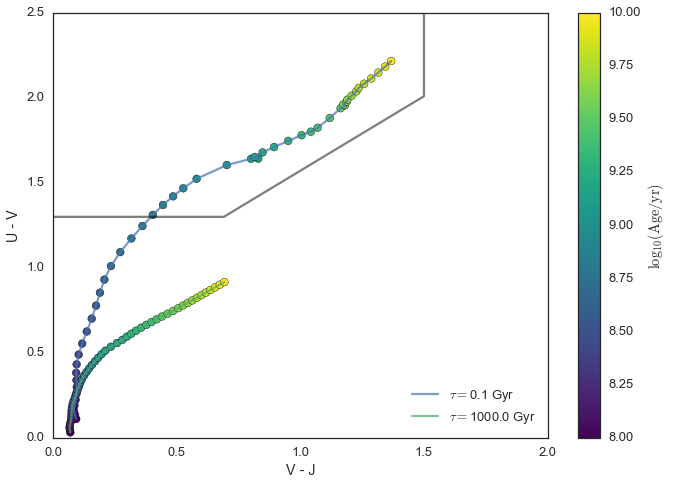

In [19]:
s1 = plt.scatter(VJ[:,0], UV[:,0], c=np.log10(ages/u.yr), 
                 s=60, cmap=plt.cm.viridis)
s2 = plt.scatter(VJ[:,1], UV[:,1], c=np.log10(ages/u.yr), 
                 s=60, cmap=plt.cm.viridis)
plt.plot(VJ[:,0], UV[:,0], label=r'$\tau = ${0}'.format(sfh[0]), alpha=0.7)
plt.plot(VJ[:,1], UV[:,1], label=r'$\tau = ${0}'.format(sfh[1]), alpha=0.7)

col = plt.colorbar(s1)
col.set_label(r'$\log_{10}(\rm{Age}/\rm{yr})$')
plt.legend(loc='lower right')
plt.xlabel('V - J')
plt.ylabel('U - V')
plt.plot([0., 0.69, 1.5, 1.5], [1.3, 1.3, 2.01, 2.5], color='k', alpha=0.5)
plt.xlim([0, 2.])
plt.ylim([0, 2.5])

## Example plot 2: UV magnitude vs age
Because we added the UV tophat filter, we can also easily plot how the rest-frame UV magnitude evolves as a function of age (for the fixed stellar mass we used to scale our SEDs):

(-10, -24)

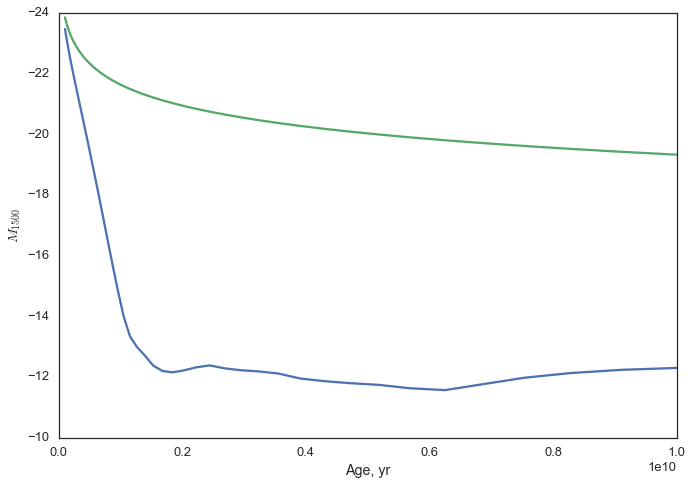

In [20]:
MUV = mags[-1]
plt.plot(ages, MUV[:,0])
plt.plot(ages, MUV[:,1])
plt.xlabel('Age, yr')
plt.ylabel(r'${M}_{1500}$')
plt.ylim([-10,-24])

In [210]:
from smpy.sfh import power
# Loading the SSP models
bc03 = BC('data/ssp/bc03/chab/lr/')

# Adding the filters
eazy_library = LoadEAZYFilters('data/FILTER.RES.v8')
filters = FilterSet()
filters.addEAZYFilter(eazy_library, [139, 141, 125])

In [277]:
# Build the CSP
models = CSP(bc03)

models.build(age=np.logspace(8,10,5) * u.yr, 
             sfh=np.linspace(0,3,5),
             dust=np.linspace(0.,2.,5),
             metal=bc03.metallicities,
             fesc=1.,
             sfh_law=power)


In [278]:
fluxes = ObserveToFile()
fluxes.build(models, filters, np.linspace(0,2,100), 'test_output.hdf')

Filter 1(Central WL = 3634.8 Angstrom):


Filter 2(Central WL = 5481.1 Angstrom):


Filter 3(Central WL = 12510.6 Angstrom):




In [280]:
fluxes.fluxes[:]

array([[[[[[[  7.86418112e+08],
            [  3.98575680e+08],
            [  1.02654456e+08],
            [  1.35055450e+07],
            [  9.14453125e+05]],

           [[  1.13594375e+06],
            [  5.80125500e+05],
            [  1.51668469e+05],
            [  2.03937734e+04],
            [  1.41967273e+03]],

           [[  1.63301746e+03],
            [  8.39944031e+02],
            [  2.22679855e+02],
            [  3.05517788e+01],
            [  2.18161440e+00]],

           [[  2.41624761e+00],
            [  1.25067258e+00],
            [  3.35683703e-01],
            [  4.68818657e-02],
            [  3.42356577e-03]],

           [[  3.70667828e-03],
            [  1.92917965e-03],
            [  5.23385534e-04],
            [  7.42389602e-05],
            [  5.52899019e-06]]],


          [[[  4.08204224e+08],
            [  2.07169392e+08],
            [  5.35028320e+07],
            [  7.06785200e+06],
            [  4.81158844e+05]],

           [[  6.30368875e